In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


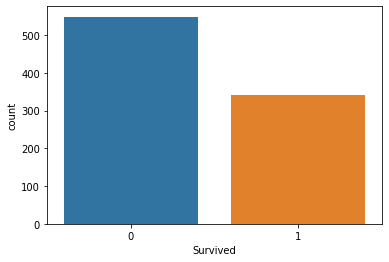

In [7]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])

In [8]:
df['Sex'] = df['Sex'].astype('category')
print(df['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): [female, male]


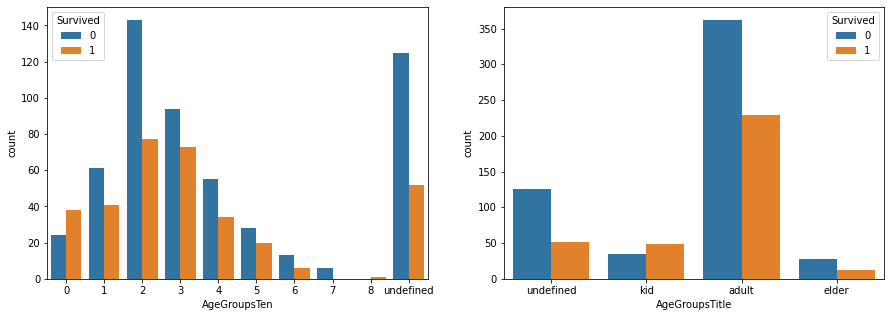

In [9]:
def group_age_by_ten(row):
    if np.isnan(row.Age):
        return 'undefined'
    return int(row.Age/10)

df['AgeGroupsTen'] = df.apply(group_age_by_ten, axis=1)
df['AgeGroupsTen'] = df['AgeGroupsTen'].astype('category')

def group_age_by_title (row):
    if row.Age < 16:
        return 1
    if 16 <= row.Age <= 55:
        return 2
    if row.Age > 55:
        return 3
    return 0
    
df['AgeGroupsTitle'] = df.apply(group_age_by_title, axis=1)
df['AgeGroupsTitle'] = df['AgeGroupsTitle'].astype('category').cat.rename_categories(['undefined', 'kid', 'adult', 'elder'])

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='AgeGroupsTen',  hue='Survived',data=df, ax = axes[0])
sns.countplot(x='AgeGroupsTitle',hue='Survived', data=df, ax = axes[1])

In [10]:
#dropping ticket, no valuable data found on it
df = df.drop('Ticket', axis=1)

In [11]:
df['Fare'] = (df['Fare']/10).astype(int)

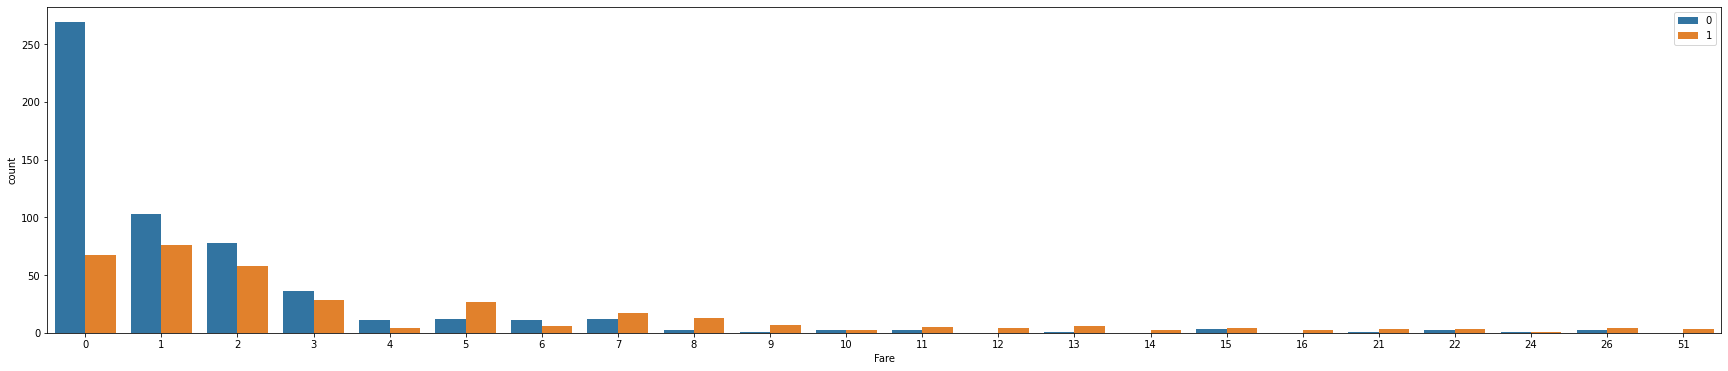

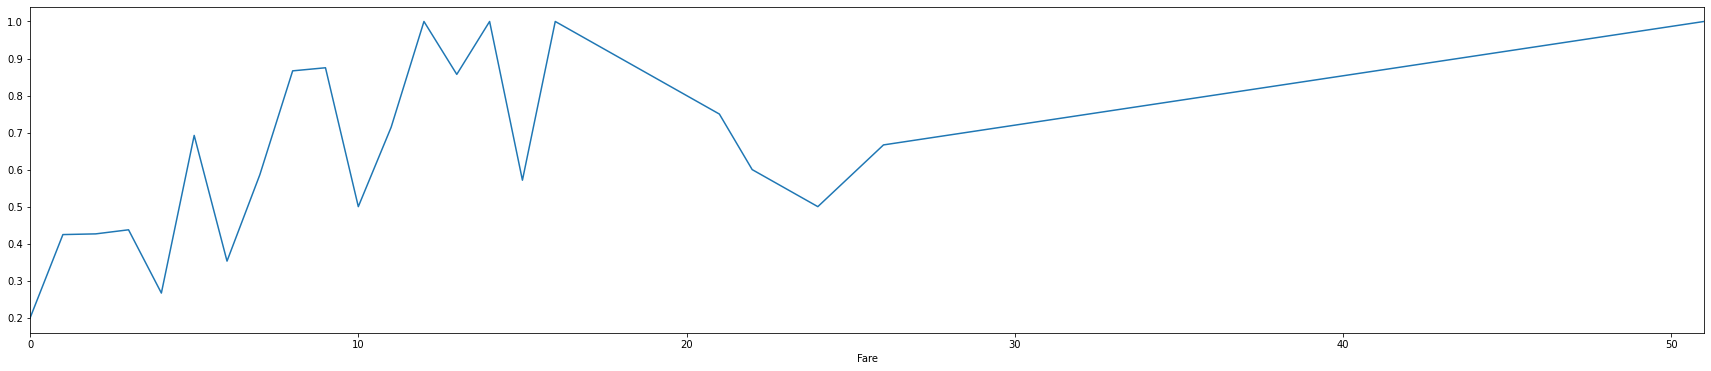

In [12]:
plt.figure(figsize=(30,6))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(30,6))
df.groupby('Fare').mean()['Survived'].plot()
plt.show()

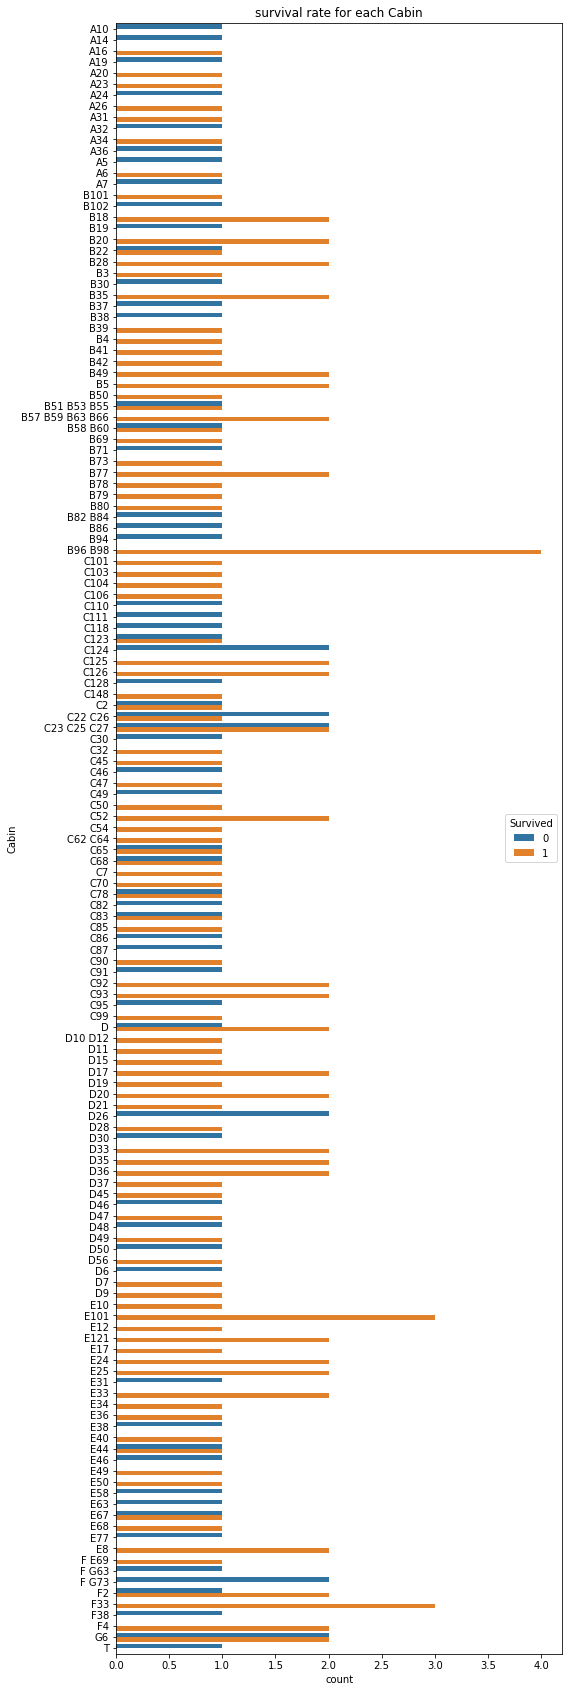

In [13]:
plt.figure(figsize=(8,30))
plt.title("survival rate for each Cabin")
sns.countplot(y='Cabin', hue='Survived', data=df.sort_values('Cabin'), orient='h')

In [14]:
def group_cabin(row):
    if pd.isna(row.Cabin):
        return 0
    if df['Cabin'].value_counts()[row.Cabin] > 1:
        return 1
    return 2

df['Cabin'] = df.apply(group_cabin, axis=1)
df['Cabin'] = df['Cabin'].astype('category').cat.rename_categories(['unidentified', 'group', 'solo'])

g = df.groupby('Cabin').mean()['Survived'].plot.bar()
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.ylim(top=1)
plt.show()

NameError: name 'ply' is not defined